# Credit Card Clustering Practice

### Dicionário

CUSTID : Identification of Credit Card holder (Categorical);  
BALANCE : Balance amount left in their account to make purchases;  
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated);  
PURCHASES : Amount of purchases made from account;  
ONEOFFPURCHASES : Maximum purchase amount done in one-go;  
INSTALLMENTSPURCHASES : Amount of purchase done in installment;  
CASHADVANCE : Cash in advance given by the user;  
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased);  
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased);  
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done);  
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid;  
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced";  
PURCHASESTRX : Numbe of purchase transactions made;  
CREDITLIMIT : Limit of Credit Card for user;  
PAYMENTS : Amount of Payment done by user;  
MINIMUM_PAYMENTS : Minimum amount of payments made by user;  
PRCFULLPAYMENT : Percent of full payment paid by user;  
TENURE : Tenure of credit card service for user

## Limpeza dos Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# # Nao sei se é a melhor opção
# df.columns = ['CUST_ID', 'SALDO', 'FREQUENCIA_SALDO', 'COMPRAS', 'COMPRA_AVISTA', 'COMPRA_PARCELADA', 'DINHEIRO_ADIANTADO',
#               'FREQUENCIA_COMPRA', 'FREQUENCIA_COMPRA_AVISTA', 'FREQUENCIA_COMPRA_PARCELADA', 'FREQUENCIA_DINHEIRO_ADIANTADO',
#               'NUM_TRANSACOES_DINHEIRO_ADIANTADO', 'NUM_TRANSACOES','LIMITE_CREDITO', 'PAGAMENTO', 'MIN_PAGAMENTO',
#               'PERCENT_PGTO_TOTAL', 'POSSE_CARTAO_CREDIT']

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Valores NaN

In [7]:
# Verificando os valores NaN
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Removendo o Registro onde temos valores NaN na variável Limite de Crédito
df = df[(df.CREDIT_LIMIT.isna() == False)]

In [9]:
# Removendo o Registro onde temos valores NaN na variável Mínimo Número de Pagamentos
df = df[(df.MINIMUM_PAYMENTS.isna() == False)]

In [10]:
df.shape

(8636, 18)

In [11]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Valores Duplicados

In [13]:
df.duplicated().sum()

0

### Salvando o dataset após limpeza para aplicar Clustering em R

In [14]:
# df.to_csv('CC GENERAL_tratado.csv')

### Selecionar quais variáveis iremos utilizar para fazer nosso agrupamento de observações

In [15]:
# Irei retirar algumas variáveis do dataset a qual não achei suficiente relevante para nosso agrupamento
df.drop(['MINIMUM_PAYMENTS', 'PAYMENTS', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX'], axis=1, inplace= True)

In [16]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.166667,0.000000,0.083333,2,1000.0,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,7000.0,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,1.000000,1.000000,0.000000,12,7500.0,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.083333,0.083333,0.000000,1,1200.0,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.666667,0.000000,0.583333,8,1800.0,0.000000,12


### Verificando presença de outliers

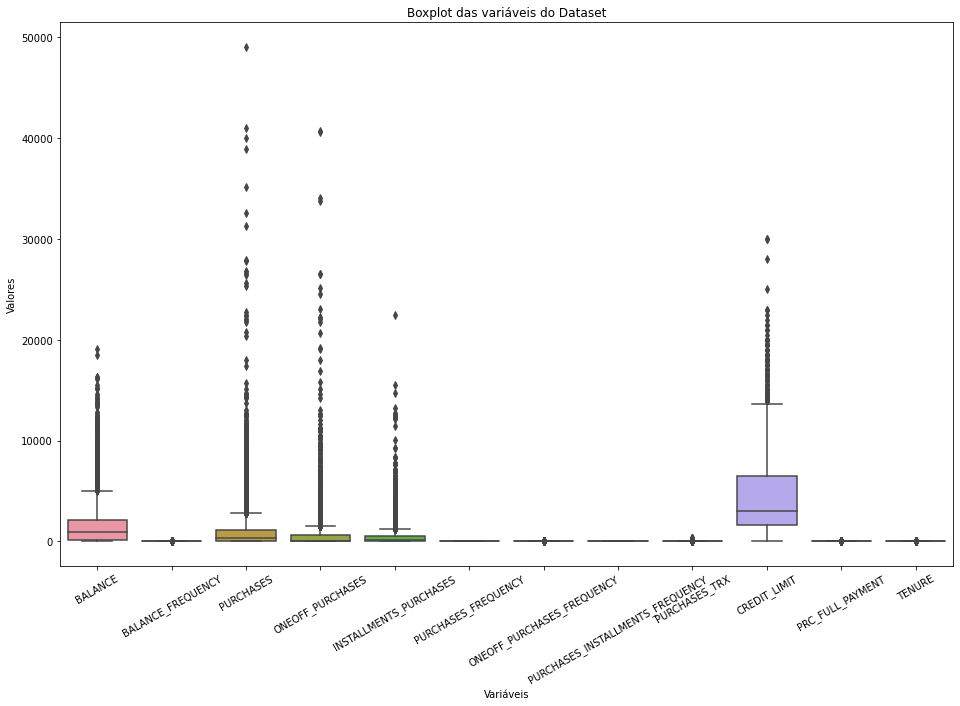

In [17]:
# Boxplot
plt.figure(figsize=(16,10))

sns.boxplot(data = pd.melt(df.drop(['CUST_ID'], axis= 1)), x = 'variable', y = 'value')
plt.title('Boxplot das variáveis do Dataset')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation = 30)
plt.show()

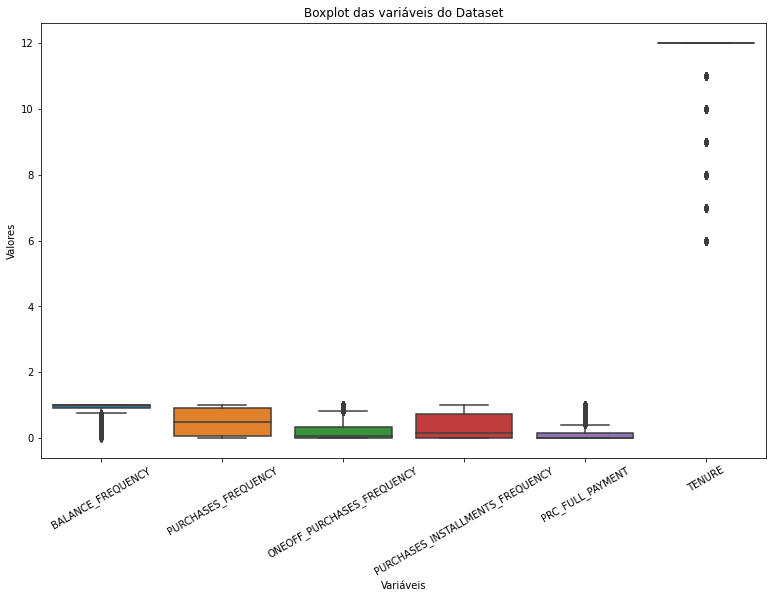

In [18]:
# Boxplot de algumas variáveis que não foram possível verificar adequadamente no plot acima devido a diferença de grandeza
plt.figure(figsize=(13,8))

sns.boxplot(data = pd.melt(df.drop(['CUST_ID','BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CREDIT_LIMIT', 'PURCHASES_TRX'], axis= 1)), x = 'variable', y = 'value')
plt.title('Boxplot das variáveis do Dataset')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation = 30)
plt.show()

> É possível verificar uma certa quantidade de outliers em algumas das variáveis

In [19]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,0.496000,0.205909,0.368820,15.033233,4522.091030,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,0.401273,0.300054,0.398093,25.180468,3659.240379,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,1600.000000,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.500000,0.083333,0.166667,7.000000,3000.000000,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,0.916667,0.333333,0.750000,18.000000,6500.000000,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,1.000000,1.000000,1.000000,358.000000,30000.000000,1.000000,12.000000


In [20]:
# Vou verificar a quantidade de outliers para algumas dessas variáveis que vistas no plot. Caso tenhamos um número proporcionalmente muito grande de outliers, excluir-los pode significar uma perda
# muito grande do nosso dataset.
# Irei considerar um outlier valores com z-score > 3
zscore = stats.zscore(df.BALANCE)
outliers = []
for i in zscore:
    if i > 3.0:
        outliers.append(i)
print(len(outliers))
print(len(df))
proporcao = len(outliers)/len(df)
print(f'Proporção de outliers no dataset: {round(len(outliers)/len(df)*100, 2)}%')

186
8636
Proporção de outliers no dataset: 2.15%


> Podemos ver que a quantidade de outliers a ser removidas representa apenas 2.15% do dataset para a variável 'BALANCE'. Portanto, iremos apenas exclui-las.

Iremos fazer a mesma coisa para todas as variáveis que apresentaram outliers

In [21]:
variaveis = df.drop(['CUST_ID', 'PURCHASES_FREQUENCY','TENURE'], axis=1).columns
variaveis = list(variaveis)
for i in variaveis:
    zscore = stats.zscore(df[i])
    outliers = []
    for x in zscore:
        if x > 3.0:
            outliers.append(x)
    print(f'Proporção de outliers da variavel {i} no dataset: {round(len(outliers)/len(df)*100, 2)}%')

Proporção de outliers da variavel BALANCE no dataset: 2.15%
Proporção de outliers da variavel BALANCE_FREQUENCY no dataset: 0.0%
Proporção de outliers da variavel PURCHASES no dataset: 1.49%
Proporção de outliers da variavel ONEOFF_PURCHASES no dataset: 1.4%
Proporção de outliers da variavel INSTALLMENTS_PURCHASES no dataset: 1.51%
Proporção de outliers da variavel ONEOFF_PURCHASES_FREQUENCY no dataset: 0.0%
Proporção de outliers da variavel PURCHASES_INSTALLMENTS_FREQUENCY no dataset: 0.0%
Proporção de outliers da variavel PURCHASES_TRX no dataset: 2.08%
Proporção de outliers da variavel CREDIT_LIMIT no dataset: 1.73%
Proporção de outliers da variavel PRC_FULL_PAYMENT no dataset: 0.0%


> É possível verificar que a quantidade de outlier em todas as variáveis representa uma parcela muito pequena do nosso dataset, portanto iremos apenas excluí-las.

In [22]:
df.shape

(8636, 13)

In [23]:
df2 = df.copy()
df2 = df2[np.abs(stats.zscore((df['BALANCE'])) < 3)]

<AxesSubplot:xlabel='BALANCE'>

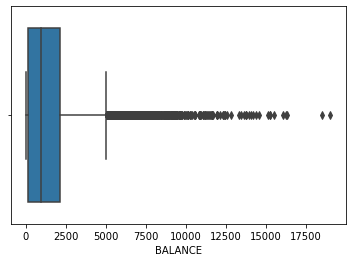

In [24]:
sns.boxplot(data = df, x = 'BALANCE')

<AxesSubplot:xlabel='BALANCE'>

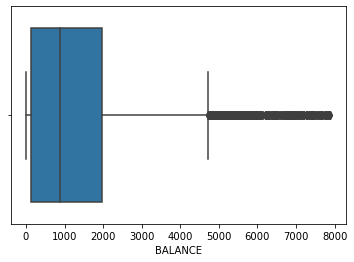

In [25]:
sns.boxplot(data = df2, x = 'BALANCE')

Podemos ver que mesmo após a remoção de outliers, novos outliers são gerados.  
Talvez trata-los de outra maneira seja o ideal.  
Por agora iremos continuar tratando os dados dessa maneira.

In [26]:
df2 = df.copy()

for x in variaveis:
    df2 = df2[(np.abs(stats.zscore(df[x])) < 3)]
    
df2.shape


C:\Users\rafajovelho\AppData\Local\Temp\ipykernel_3112\1057002953.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(np.abs(stats.zscore(df[x])) < 3)]


(7924, 13)

In [27]:
print(f'Ainda temos {round(len(df2)/len(df)*100,2)}% do dataset original.')

Ainda temos 91.76% do dataset original.


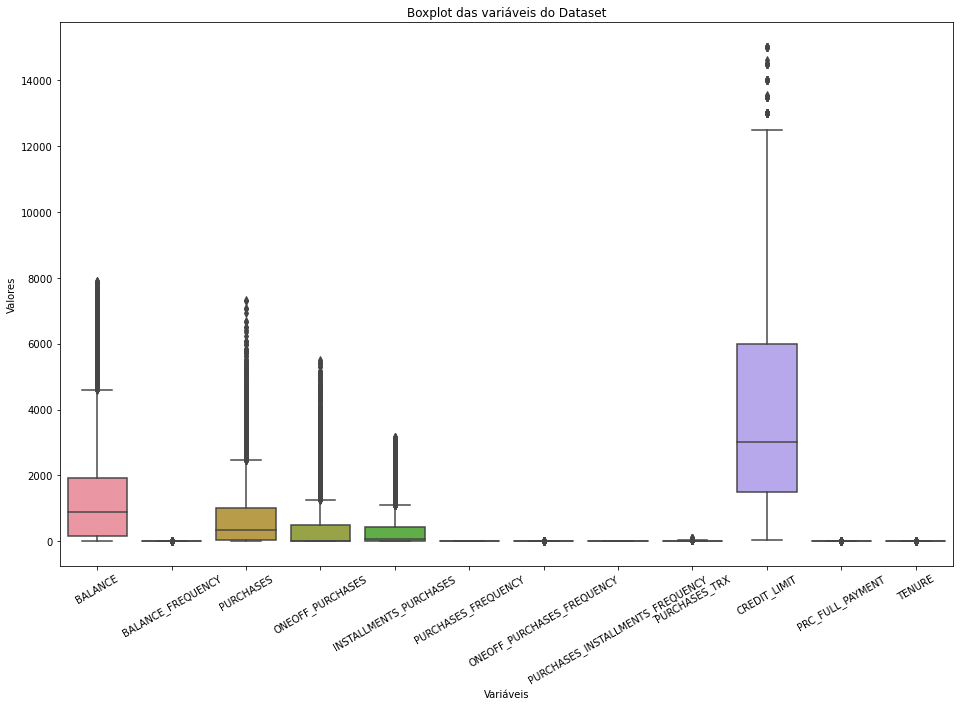

In [28]:
# Boxplot
plt.figure(figsize=(16,10))

sns.boxplot(data = pd.melt(df2.drop(['CUST_ID'], axis= 1)), x = 'variable', y = 'value')
plt.title('Boxplot das variáveis do Dataset')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation = 30)
plt.show()

> Como dito anteriormente, ainda é possível verificar a presença de outliers. Como esse não é o foco desse script, seguiremos assim mesmo.  
> Tentaremos outros approach posteriormente em caso de um resultado ruim.

<AxesSubplot:xlabel='CREDIT_LIMIT'>

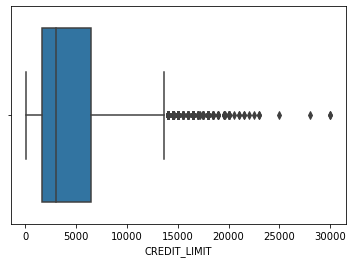

In [29]:
# Visualiazando o antes e depois da variavel CREDIT_LIMIT
sns.boxplot(data = df, x = 'CREDIT_LIMIT')

<AxesSubplot:xlabel='CREDIT_LIMIT'>

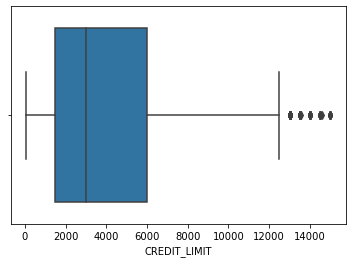

In [30]:
sns.boxplot(data = df2, x = 'CREDIT_LIMIT')

> Novamente, foi possível verificar uma diminuição no número de outliers, porém ainda temos uma certa quantidade

In [31]:
# upper_limit = df.BALANCE.mean() + 3*df.BALANCE.std()
# lower_limit = df.BALANCE.mean() - 3*df.BALANCE.std()
# print('media', df.BALANCE.mean())
# print('desvio padrao', df.BALANCE.std())
# print('upper limit', upper_limit)
# print('lower_limit', lower_limit)

# df[(df.BALANCE) > 7887.93]

### Padronização por z-score

In [32]:
df2.set_index('CUST_ID', inplace=True)

In [33]:
# Iremos padronizar o dataset (media = 0, desvio padrão = 1)
scale = StandardScaler()

In [34]:
scale.fit(df2)

StandardScaler()

In [35]:
df2_scaled = scale.transform(df2)

In [36]:
df2_scaled = pd.DataFrame(df2_scaled, columns= df2.columns)

In [37]:
## Visualização dendograma
# Não é possivel visualizar o grafico por ser mt pesado

plt.figure(figsize=(200,160))

dendograma = sch.dendrogram(sch.linkage(df2_scaled[:5000], method = 'single', metric = 'euclidean'))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 2.6, color = 'red', linestyle = '--')
plt.show()

> Quando colocamos uma grande quantidade de registros, a visualização do Dendograma fica muito ruim. Portanto creio que temos que testar a quantidade de clusters pra ver qual ficaria melhor.

### Criação do Cluster

Como é basicamente impossível definir a quantidade de clusters, irei criar 5 clusters

In [38]:
# Metodo Hierárquico Aglomerativo
cluster_sing = AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='single')
indica_cluster_sing = cluster_sing.fit_predict(df2_scaled)

In [39]:
df2_scaled['cluster_single'] = indica_cluster_sing
df2_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,cluster_single
0,-0.834114,-0.470571,-0.630847,-0.536285,-0.442660,-0.798346,-0.665117,-0.696382,-0.652213,-1.016656,-0.531385,0.364817,0
1,1.105696,0.020224,-0.723602,-0.536285,-0.631134,-1.217342,-0.665117,-0.909029,-0.783922,0.966400,0.238486,0.364817,0
2,0.671714,0.511020,0.028125,0.439258,-0.631134,1.296627,2.844146,-0.909029,0.006333,1.131654,-0.531385,0.364817,0
3,-0.357492,0.511020,-0.708045,-0.516097,-0.631134,-1.007845,-0.372679,-0.909029,-0.718067,-0.950554,-0.531385,0.364817,0
4,0.251229,0.511020,0.572701,-0.536285,2.002908,0.458638,-0.665117,0.579506,-0.257085,-0.752248,-0.531385,0.364817,0


In [40]:
df2_scaled.cluster_single.value_counts()

0    7920
3       1
2       1
4       1
1       1
Name: cluster_single, dtype: int64

df2_scaled[(df2_scaled)]

In [41]:
df2_scaled[(df2_scaled.cluster_single) != 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,cluster_single
1003,-0.851442,-3.415348,4.382779,2.619336,4.803849,1.296627,-0.080238,1.642747,1.850260,1.082078,-0.242684,0.364817,3
1344,2.028898,-1.452161,6.146509,5.184498,4.371210,0.249139,0.504636,0.366859,4.945424,1.957927,-0.531385,0.364817,2
4798,-0.392361,-0.388774,2.135629,2.799980,-0.045128,0.877631,2.259268,-0.058438,2.706369,2.453691,-0.531385,-4.097461,4
6134,2.062067,-0.388774,3.248893,3.447431,1.203220,0.877631,1.089515,0.366859,1.257569,1.131654,-0.531385,-4.097461,1


In [42]:
df2.iloc[319]

BALANCE                               154.641707
BALANCE_FREQUENCY                       0.363636
PURCHASES                            1897.920000
ONEOFF_PURCHASES                       97.920000
INSTALLMENTS_PURCHASES               1800.000000
PURCHASES_FREQUENCY                     0.250000
ONEOFF_PURCHASES_FREQUENCY              0.166667
PURCHASES_INSTALLMENTS_FREQUENCY        0.166667
PURCHASES_TRX                           5.000000
CREDIT_LIMIT                        13500.000000
PRC_FULL_PAYMENT                        1.000000
TENURE                                 12.000000
Name: C10424, dtype: float64

In [43]:
df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
count,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000
mean,1400.367223,0.905345,744.242369,425.034578,319.462672,0.484231,0.189532,0.356234,11.903836,4076.027864,0.153383,11.509465
std,1629.935592,0.185240,1028.589846,792.604181,506.204699,0.397802,0.284978,0.391909,15.185939,3025.825300,0.288667,1.344690
min,0.004816,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,6.000000
25%,149.293833,0.909091,32.075000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,1500.000000,0.000000,12.000000
50%,896.591539,1.000000,351.250000,22.095000,84.000000,0.500000,0.083333,0.166667,7.000000,3000.000000,0.000000,12.000000
75%,1929.850780,1.000000,1006.002500,505.022500,439.940000,0.916667,0.250000,0.750000,16.000000,6000.000000,0.166667,12.000000
max,7886.875682,1.000000,7323.380000,5497.040000,3165.820000,1.000000,1.000000,1.000000,90.000000,15000.000000,1.000000,12.000000


A clusterização nao ficou legal. Será preciso tratar novamente os dados para termos um resultado diferente

### Tratamento de outliers v2

In [44]:
len(df.columns)

13

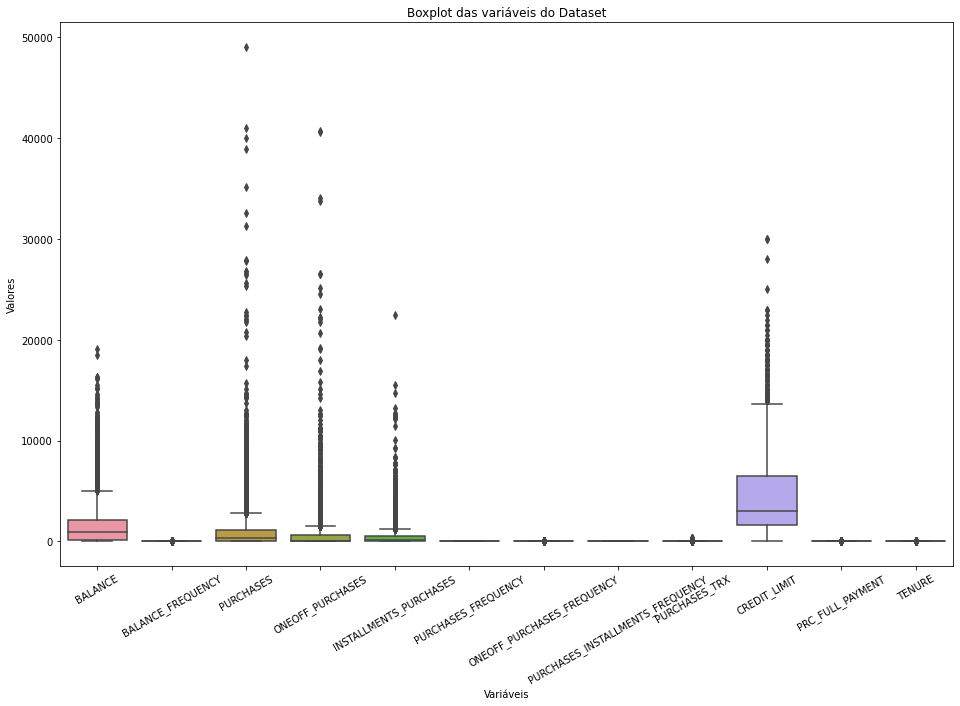

In [45]:
# Boxplot
plt.figure(figsize=(16,10))

sns.boxplot(data = pd.melt(df.drop(['CUST_ID'], axis= 1)), x = 'variable', y = 'value')
plt.title('Boxplot das variáveis do Dataset')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation = 30)
plt.show()

### IQR

In [46]:
# Iremos usar IQR para tratamento dos dados
# IQR = Q3 - Q1
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR

<AxesSubplot:xlabel='BALANCE', ylabel='Count'>

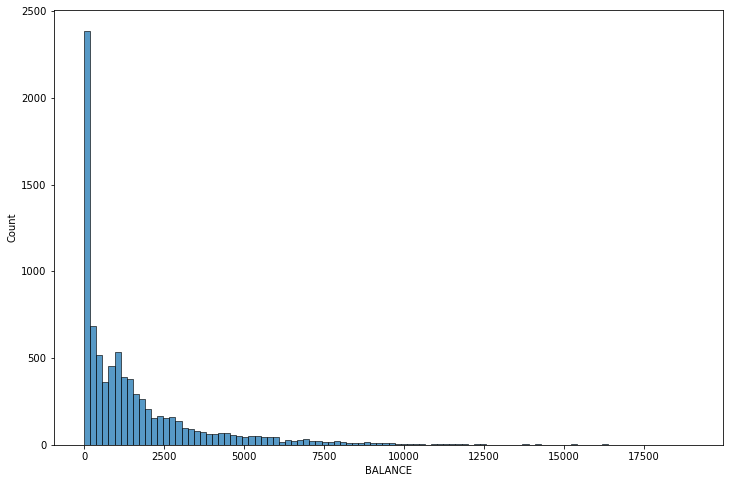

In [47]:
plt.figure(figsize = (12,8))
sns.histplot(df.BALANCE)

In [48]:
df[(df.BALANCE) > 5040]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,0.500000,0.000000,0.500000,11,8000.0,0.0,12
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,1.000000,0.916667,1.000000,92,11250.0,0.0,12
24,C10025,5368.571219,1.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,6000.0,0.0,11
28,C10029,7152.864372,1.000000,387.05,204.55,182.50,0.666667,0.166667,0.416667,8,10500.0,0.0,12
30,C10031,12136.219960,1.000000,3038.01,1013.20,2024.81,1.000000,0.166667,1.000000,64,13000.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8309,C18530,6008.914524,0.777778,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,9000.0,0.0,9
8411,C18637,5934.610587,1.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,6000.0,0.0,12
8438,C18666,5484.339435,1.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,6000.0,0.0,12
8705,C18942,7302.672686,1.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,9000.0,0.0,12


In [49]:
len(df)

8636

In [50]:
# Checando como funcionária com 
IQR = df.BALANCE.quantile(q= 0.75) - df.BALANCE.quantile(q= 0.25)
lower_limit = df.BALANCE.quantile(q= 0.25) - 1.5 * IQR
upper_limit = df.BALANCE.quantile(q = 0.75) + 1.5 * IQR
print(f'upper_limit: {upper_limit} \nlower_limit: {lower_limit}')

upper_limit: 5040.8468490000005 
lower_limit: -2787.555807


In [51]:
df3 = df.copy()
df3.drop(columns= 'CUST_ID', axis = 1, inplace=True)
df3.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PURCHASES_TRX', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [52]:
# Functions to return the index of the outliers for a column
def outliers(df, ft):
        Q1 = df[ft].quantile(0.25)
        Q3 = df[ft].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        
        
        ls = df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]
        
        return ls

In [53]:
# Testando com uma varíavel
outliers(df3, 'BALANCE')

Int64Index([  15,   21,   24,   28,   30,   32,   36,   38,   44,   59,
            ...
            7962, 7963, 8026, 8151, 8217, 8309, 8411, 8438, 8705, 8941],
           dtype='int64', length=666)

In [54]:
# Create a empty list to store the output indices from multiple columns

index_list = []

for columns in df3.columns:
    index_list.extend(outliers(df3, columns))
print(len(index_list))

9058


In [55]:
# Checar quantos valores duplicados temos na lista com os index que teriamos que tirar por serem outliers
newlist = []
duplicatedlist = []
for i in index_list:
    if i not in newlist:
        newlist.append(i)
    else:
        duplicatedlist.append(i)
        
print(f'Número de Registros a serem removidos do dataset: {len(newlist)}')
print(f'Número total de registros do dataset: {len(df)}')

Número de Registros a serem removidos do dataset: 4950
Número total de registros do dataset: 8636


> Dessa maneira eu teria que estar removendo quase 5000 registros, quantidade que representa mais que a metade do nosso dataset, portanto esse método nao funciona muito bem para o nosso caso.

> Irei tentar reduzir as variáveis por PCA, para termos um dataset BI ou TRIdimensonal e então tratarmos os outliers e tentarmos agrupá-los

In [56]:
df3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.166667,0.000000,0.083333,2,1000.0,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,7000.0,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,1.000000,1.000000,0.000000,12,7500.0,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.083333,0.083333,0.000000,1,1200.0,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.666667,0.000000,0.583333,8,1800.0,0.000000,12


### PCA

Estou partindo do pressuposto que as variáveis '_FREQUENCY' também são métricas.

<AxesSubplot:>

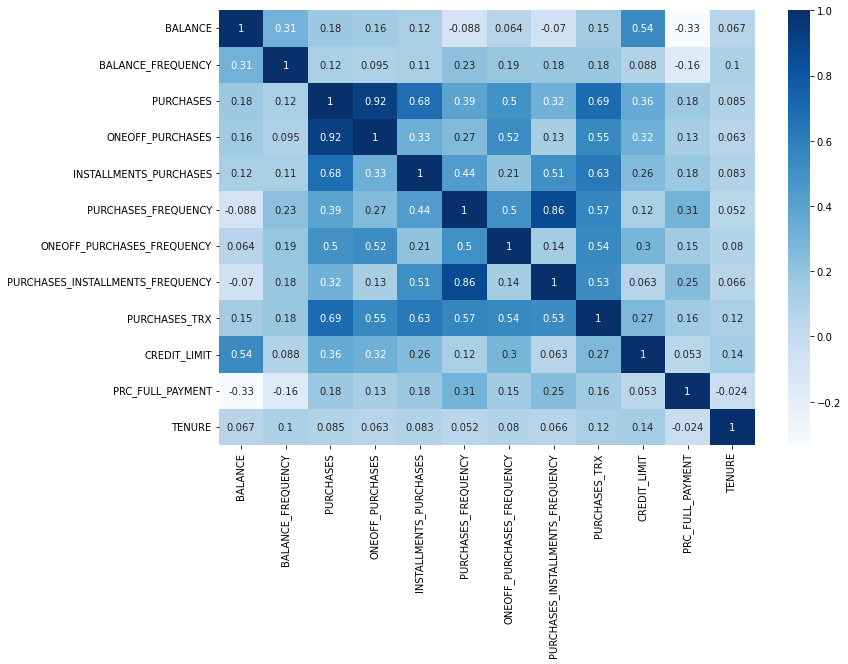

In [57]:
plt.figure(figsize=(12,8))

sns.heatmap(data=df3.corr(), annot = True, cmap = 'Blues')

In [58]:
# Irei remover algumas variáveis que não possuem muita correlação com as outras variáveis e que atrapalhariam a crianca dos Fatores.
df3.drop(columns=['TENURE', 'PRC_FULL_PAYMENT', 'BALANCE_FREQUENCY'], axis = 1, inplace = True)

In [59]:
# Matriz de correlação com indicando também por meio de *** se os coeficientes de correlaçao sao estatisticamente != 0
matriz_corr = pg.rcorr(df3, method= 'pearson', upper = 'pval', decimals= 4, pval_stars = {0.01: '***', 0.05: '**', 0.1 : '*'}) # se p-valor = 0.01 -> ***; se 0.05 -> **; se 0.1 -> *
print(matriz_corr)

                                  BALANCE PURCHASES ONEOFF_PURCHASES  \
BALANCE                                 -       ***              ***   
PURCHASES                          0.1761         -              ***   
ONEOFF_PURCHASES                     0.16    0.9168                -   
INSTALLMENTS_PURCHASES             0.1221    0.6793           0.3296   
PURCHASES_FREQUENCY               -0.0885     0.393           0.2655   
ONEOFF_PURCHASES_FREQUENCY         0.0638    0.4974           0.5245   
PURCHASES_INSTALLMENTS_FREQUENCY  -0.0696     0.316           0.1284   
PURCHASES_TRX                      0.1479    0.6887           0.5453   
CREDIT_LIMIT                       0.5355    0.3584           0.3206   

                                 INSTALLMENTS_PURCHASES PURCHASES_FREQUENCY  \
BALANCE                                             ***                 ***   
PURCHASES                                           ***                 ***   
ONEOFF_PURCHASES                          

In [60]:
# Teste de Esfericidade de Barlett
barlett , p_valor = calculate_bartlett_sphericity(df3)
print(f'Estatística de Barlett: {barlett}')
print(f'p-valor: {round(p_valor, 5)}')

Estatística de Barlett: 133504.69409865045
p-valor: 0.0


> como p-valor = 0 , rejeitamos a Hipótese Nula de que a npssa matriz de correlação é igual a matriz identidade

In [61]:
# Definindo a PCA (procedimento preliminar)
fa = FactorAnalyzer()
fa.fit(df3)

FactorAnalyzer(rotation_kwargs={})

In [62]:
# Obtendo autovalores (Eigenvalues)
ev, v = fa.get_eigenvalues() # Eigenvalue and Eigenvectors

print(ev) # Possuimos 9 autovalores pois temos 9 variáveis
print(v) # 9 autovetores
# Lembrando que temos 'K' autovalores que somados resultará em K
print(sum(ev))

[4.13619997e+00 1.71874549e+00 1.11000776e+00 8.35782372e-01
 4.44712660e-01 4.40590230e-01 2.66529069e-01 4.74207253e-02
 1.17323172e-05]
[ 3.9204181   1.70049902  1.02464852  0.36582169  0.31296728 -0.00954949
 -0.07964267 -0.15495682 -0.41025655]
9.0


In [63]:
# Critério de Kaiser
# Segundo o Critério de Kaiser utilizaremos apenas autovalores com valor maior que 1 !!!
# Portanto, iremos usar apenas os 3 primeiros autovalores
# Parametrizando a PCA apenas para 3 fatores (autovalores > 1)
fa.set_params(n_factors = 3, method = 'principal', rotation = None)
fa.fit(df3)

FactorAnalyzer(method='principal', rotation=None, rotation_kwargs={})

In [64]:
# Eigenvalues, variâncias e variâncias acumulada
eigen_fatores = fa.get_factor_variance()
eigen_fatores


tabela_eigen = pd.DataFrame(eigen_fatores) # tabela com os auto valores na linha 0, variancia na linha 1 e variancia acumulada na linha 2
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.136200   0.459578             0.459578
Fator 2   1.718745   0.190972             0.650549
Fator 3   1.110008   0.123334             0.773884


> Pode-se verificar que temos 77% da variancia acumulada contida nesses 3 fatores. Apesar de ainda não estar representando 80% das variáveis, iremos continuar com esses 3 fatores. (talvez pudessemos adicionar uma quarta um quarto fator, ja que seu autor valor estava muti próximo de 1)

In [65]:
# Determinando as cargas fatoriais

cargas_fatores = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f'Fator {i+1}' for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = df3.columns
tabela_cargas

print(tabela_cargas)

                                   Fator 1   Fator 2   Fator 3
BALANCE                           0.211682  0.678148  0.551176
PURCHASES                         0.878763  0.220809 -0.264004
ONEOFF_PURCHASES                  0.733919  0.350052 -0.463104
INSTALLMENTS_PURCHASES            0.728671 -0.121353  0.226822
PURCHASES_FREQUENCY               0.714356 -0.548328  0.161142
ONEOFF_PURCHASES_FREQUENCY        0.649709  0.110337 -0.360976
PURCHASES_INSTALLMENTS_FREQUENCY  0.613153 -0.631707  0.383358
PURCHASES_TRX                     0.860556 -0.076289 -0.010345
CREDIT_LIMIT                      0.447916  0.595927  0.408975


> Pode-se notar que o Fator 1 não representa as variáveis 'BALANCE'  e 'CREDIT_LIMIT' quanto representa as restantes, enquanto o Fator 3 é o contrário.  
> Já o Fator 2 parece estar mais mixado.

In [66]:
#%% Determinando as comunalidades (serve para verificarmos se houve uma perda muito relevante de variancia das nossas variáveis)

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = df3.columns
tabela_comunalidades

print(tabela_comunalidades)   

                                  Comunalidades
BALANCE                                0.808489
PURCHASES                              0.890679
ONEOFF_PURCHASES                       0.875638
INSTALLMENTS_PURCHASES                 0.597136
PURCHASES_FREQUENCY                    0.836935
ONEOFF_PURCHASES_FREQUENCY             0.564600
PURCHASES_INSTALLMENTS_FREQUENCY       0.921973
PURCHASES_TRX                          0.746484
CREDIT_LIMIT                           0.723019


> Nota-se que a unica variável que teve uma perca mais significantes de variancia foi a 'ONEOFF_PURCHASES_FREQUENCY'

In [67]:
#%% Resultados dos fatores para as observações do dataset (predict)

df_fatores = pd.DataFrame(fa.transform(df3))
df_fatores.columns = [f'Fator {i+1}' for i, v in enumerate(df_fatores.columns)]


print(df_fatores)

       Fator 1   Fator 2   Fator 3
0    -0.823331 -0.226420 -0.683822
1    -0.715514  1.152101  0.526886
2     0.492384  0.603352 -0.593279
3    -0.854400  0.106164 -0.688510
4     0.053670 -0.709212  0.568313
...        ...       ...       ...
8631 -0.814451 -0.160576 -1.013300
8632 -0.095813 -1.594321  0.286079
8633 -0.280570 -1.304524  0.063758
8634 -0.985773 -0.064297 -0.883316
8635  0.092104 -0.161266 -1.608402

[8636 rows x 3 columns]


In [68]:
# Concatenando esse dataframe com os vetores no nosso dataset original
df3_factor = pd.concat([df3.reset_index(drop=True), df_fatores], axis = 1 )
df3_factor

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,Fator 1,Fator 2,Fator 3
0,40.900749,95.40,0.00,95.40,0.166667,0.000000,0.083333,2,1000.0,-0.823331,-0.226420,-0.683822
1,3202.467416,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,7000.0,-0.715514,1.152101,0.526886
2,2495.148862,773.17,773.17,0.00,1.000000,1.000000,0.000000,12,7500.0,0.492384,0.603352,-0.593279
3,817.714335,16.00,16.00,0.00,0.083333,0.083333,0.000000,1,1200.0,-0.854400,0.106164,-0.688510
4,1809.828751,1333.28,0.00,1333.28,0.666667,0.000000,0.583333,8,1800.0,0.053670,-0.709212,0.568313
...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,20.90,20.90,0.00,0.166667,0.166667,0.000000,1,500.0,-0.814451,-0.160576,-1.013300
8632,28.493517,291.12,0.00,291.12,1.000000,0.000000,0.833333,6,1000.0,-0.095813,-1.594321,0.286079
8633,23.398673,144.40,0.00,144.40,0.833333,0.000000,0.666667,5,1000.0,-0.280570,-1.304524,0.063758
8634,13.457564,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,500.0,-0.985773,-0.064297,-0.883316


In [69]:
#%% Identificando os scores fatoriais (serve quase como a mesma coisa que a carga fatorial visto anteriormente)

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f'Fator {i+1}' for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = df3.columns
tabela_scores

print(tabela_scores)

                                   Fator 1   Fator 2   Fator 3
BALANCE                           0.051178  0.394560  0.496552
PURCHASES                         0.212457  0.128471 -0.237840
ONEOFF_PURCHASES                  0.177438  0.203667 -0.417208
INSTALLMENTS_PURCHASES            0.176169 -0.070606  0.204343
PURCHASES_FREQUENCY               0.172708 -0.319028  0.145172
ONEOFF_PURCHASES_FREQUENCY        0.157079  0.064196 -0.325201
PURCHASES_INSTALLMENTS_FREQUENCY  0.148241 -0.367540  0.345365
PURCHASES_TRX                     0.208055 -0.044387 -0.009320
CREDIT_LIMIT                      0.108292  0.346722  0.368444


In [70]:
# Conferindo se a correlação entre os fatores são de fato 0 (fatores devem ser ortogonais entre si)

corr_fator = pg.rcorr(df3_factor[['Fator 1','Fator 2', 'Fator 3']], method='pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
print(corr_fator)


        Fator 1 Fator 2 Fator 3
Fator 1       -                
Fator 2    -0.0       -        
Fator 3    -0.0    -0.0       -


> De fato são ortogonais

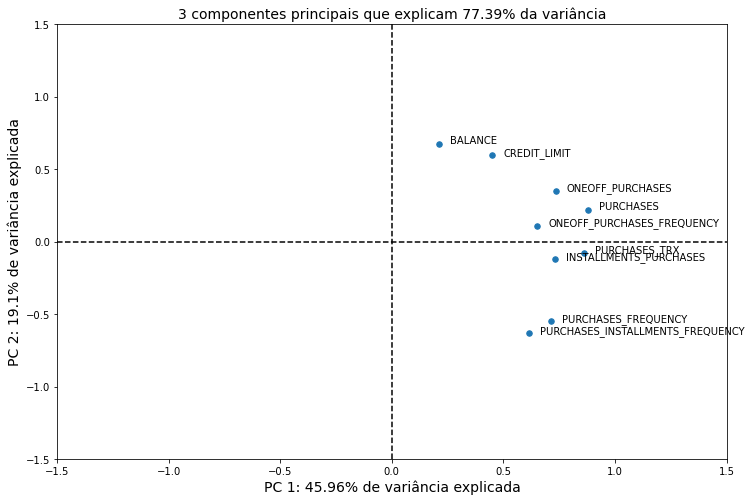

In [71]:
# Loading plot dos fatores (só da pra fzr com dois fatores)

plt.figure(figsize=(12,8))

tabela_cargas_chart = tabela_cargas.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"PC 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"PC 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

### Clustering

Agora iremos fazer o clustering(KMeans) com os fatores

In [72]:
# Possível ver que os registros ja estão padronizados (mean = 0, std = 1)
df3_factor[['Fator 1', 'Fator 2', 'Fator 3']].describe()

,Fator 1,Fator 2,Fator 3
count,8.636000e+03,8.636000e+03,8.636000e+03
mean,8.132551e-17,-1.645954e-16,7.263502e-17
std,1.000058e+00,1.000058e+00,1.000058e+00
min,-9.953557e-01,-1.830941e+00,-1.121201e+01
25%,-7.166634e-01,-6.921669e-01,-5.863752e-01
50%,-2.118423e-01,5.915691e-02,-8.676495e-02
75%,3.588448e-01,5.078649e-01,5.446925e-01
max,1.340236e+01,1.016677e+01,5.949837e+00


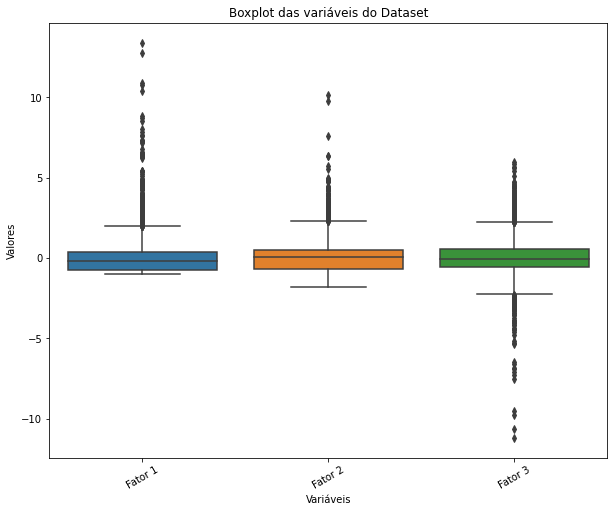

In [73]:
# Irei fazer um boxplot dos fatores criado para verificar presença de outliers
plt.figure(figsize=(10,8))

sns.boxplot(data = pd.melt(df3_factor[['Fator 1', 'Fator 2', 'Fator 3']]), x = 'variable', y = 'value')
plt.title('Boxplot das variáveis do Dataset')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation = 30)
plt.show()

> Há uma quantidade razoavel de outliers nos fatores. Se faz necessário um tratamento desses nos fatores?

In [74]:
print(df3_factor['Fator 3'].nsmallest(5))
print(df3_factor['Fator 3'].nlargest(5))

3792   -11.212011
464    -10.622428
1509    -9.754902
512     -9.534325
1467    -7.512991
Name: Fator 3, dtype: float64
3059    5.949837
5107    5.855884
2252    5.660239
5309    5.579261
5086    5.422629
Name: Fator 3, dtype: float64


In [75]:
print(f"media: {round(df3_factor['Fator 3'].mean(), 2)}; desvio padrao: {round(df3_factor['Fator 3'].std(),2)}")
print()

media: 0.0; desvio padrao: 1.0



In [76]:
# Vou deixar df3_factor apenas com os fatores
df3_factor2 = df3_factor[['Fator 1', 'Fator 2', 'Fator 3']]

In [77]:
# Kmeans 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters = 5, init = 'random')

In [78]:
kmeans.fit(df3_factor2)

KMeans(init='random', n_clusters=5)

In [79]:
# Identificar os cluster gerados
kmeans_cluster = kmeans.labels_
print(kmeans_cluster)

[4 4 3 ... 2 4 4]


In [80]:
df3_factor2['cluster_kmeans'] = kmeans_cluster

C:\Users\rafajovelho\AppData\Local\Temp\ipykernel_3112\1868447922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_factor2['cluster_kmeans'] = kmeans_cluster


In [81]:
df3_factor2.sample(15)

,Fator 1,Fator 2,Fator 3,cluster_kmeans
2871,-0.188342,-0.904786,0.301165,2
4027,-0.735134,0.498970,-0.249366,4
1420,-0.380738,0.334556,-0.502615,4
5002,-0.592764,1.014575,0.273115,4
8303,-0.975975,0.011242,-0.788251,4
8406,-0.556182,2.113660,1.699887,0
2712,-0.549574,1.764363,1.204625,0
7929,-0.007927,-1.759079,0.417110,2
8315,1.004795,0.078806,-3.003312,3
5271,-0.951009,0.110333,-0.676536,4


In [82]:
# Podemos verificar que os cluster estão mais balanceadas quanto ao que se diz respeito número de registro em cada agrupamento após a Análise Fatoria e PCA
df3_factor2.cluster_kmeans.value_counts()

4    4023
2    2521
3    1068
0     983
1      41
Name: cluster_kmeans, dtype: int64

In [83]:
# Identificando as coordenadas centróides dos cluster finais
cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = df3_factor2.drop(columns = 'cluster_kmeans').columns
cent_finais.index.name = 'cluster'
print(cent_finais)

          Fator 1   Fator 2   Fator 3
cluster                              
0        0.117957  1.513010  1.544703
1        6.234348  3.720805 -4.475109
2        0.286365 -1.085105  0.518209
3        1.347628  0.076075 -0.852221
4       -0.630365  0.252566 -0.429624


> Aqui podemos analisar as características de cada um dos clusters. Como está separado em fatores, análise requer um pouco mais de atenção e análise, visto que cada fator não representa uma variável em especifico e sim um pouco de todas as variáveis (algumas mais e algumas menos a depende do fator. Isso pode ser analisado nos scores de cada variável nos fatores)

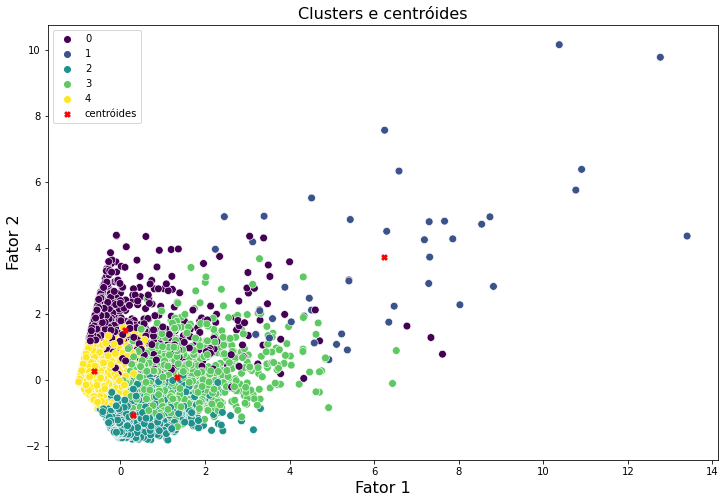

In [84]:
#%% Plotando as observações e seus centróides dos clusters
plt.figure(figsize=(12,8))

pred_y = kmeans.fit_predict(df3_factor2[['Fator 1', 'Fator 2', 'Fator 3']])
sns.scatterplot(x = 'Fator 1', y = 'Fator 2', data = df3_factor2, hue = 'cluster_kmeans', palette= 'viridis', s = 60)
plt.scatter(cent_finais['Fator 1'], cent_finais['Fator 2'], s = 30, c = 'red', label = 'centróides', marker='X')
plt.title('Clusters e centróides', fontsize=16)
plt.xlabel('Fator 1', fontsize=16)
plt.ylabel('Fator 2', fontsize=16)
plt.legend()
plt.show()

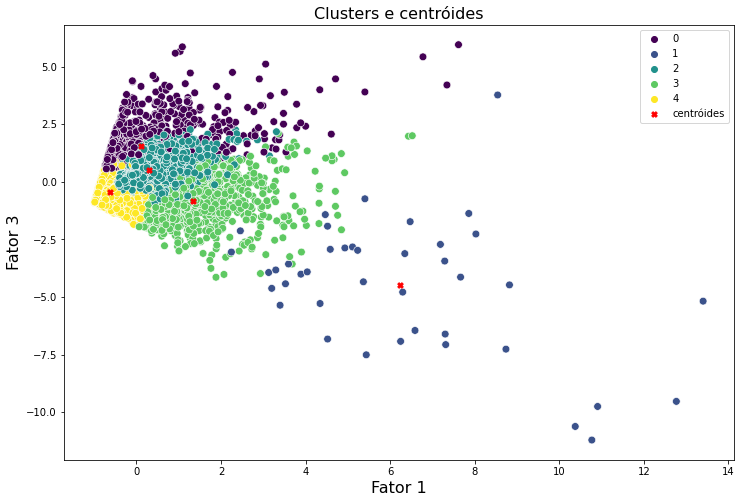

In [85]:
#%% Plotando as observações e seus centróides dos clusters
plt.figure(figsize=(12,8))

pred_y = kmeans.fit_predict(df3_factor2[['Fator 1', 'Fator 2', 'Fator 3']])
sns.scatterplot(x = 'Fator 1', y = 'Fator 3', data = df3_factor2, hue = 'cluster_kmeans', palette= 'viridis', s = 60)
plt.scatter(cent_finais['Fator 1'], cent_finais['Fator 3'], s = 30, c = 'red', label = 'centróides', marker='X')
plt.title('Clusters e centróides', fontsize=16)
plt.xlabel('Fator 1', fontsize=16)
plt.ylabel('Fator 3', fontsize=16)
plt.legend()
plt.show()

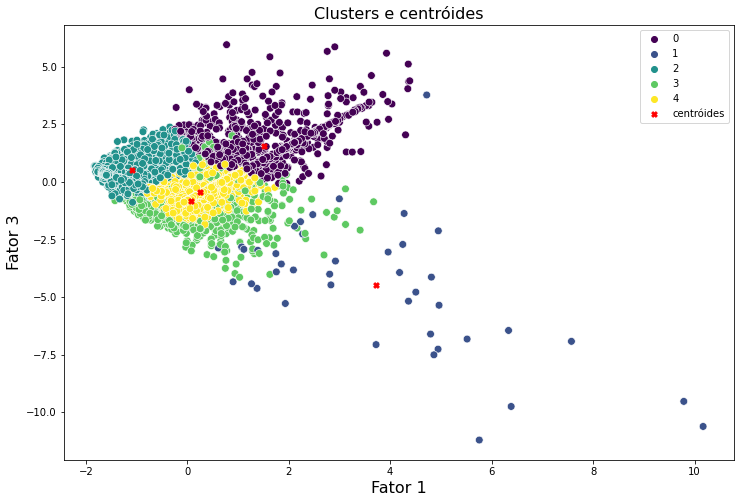

In [86]:
#%% Plotando as observações e seus centróides dos clusters
plt.figure(figsize=(12,8))

pred_y = kmeans.fit_predict(df3_factor2[['Fator 1', 'Fator 2', 'Fator 3']])
sns.scatterplot(x = 'Fator 2', y = 'Fator 3', data = df3_factor2, hue = 'cluster_kmeans', palette= 'viridis', s = 60)
plt.scatter(cent_finais['Fator 2'], cent_finais['Fator 3'], s = 30, c = 'red', label = 'centróides', marker='X')
plt.title('Clusters e centróides', fontsize=16)
plt.xlabel('Fator 1', fontsize=16)
plt.ylabel('Fator 3', fontsize=16)
plt.legend()
plt.show()

In [87]:
df3_factor2.cluster_kmeans.value_counts()

4    4023
2    2521
3    1068
0     983
1      41
Name: cluster_kmeans, dtype: int64

Podemos verificar que o cluster é o que tem menos registros e é também o que ta mais esparço, menos definido.

In [88]:
# Identificando as coordenadas centróides dos cluster finais (para vermos as caracteristicas de cada um dos cluster formados)
cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = df3_factor2.drop(columns = 'cluster_kmeans').columns
cent_finais.index.name = 'cluster'
print(cent_finais)

          Fator 1   Fator 2   Fator 3
cluster                              
0       -0.630624  0.253336 -0.428641
1        1.346520  0.075919 -0.852770
2        6.234348  3.720805 -4.475109
3        0.286365 -1.085105  0.518209
4        0.120504  1.514056  1.547747


> Como dito anteriormente, este resultado obtido foi com alguns valores outliers nas variáveis Fatores 1 2 e 3.  
> Irei tentar remove-los e ver o que obtemos

In [89]:
df4 = df3_factor2.copy()
df4.drop(columns='cluster_kmeans', axis = 1, inplace= True)
df4.head()

,Fator 1,Fator 2,Fator 3
0,-0.823331,-0.226420,-0.683822
1,-0.715514,1.152101,0.526886
2,0.492384,0.603352,-0.593279
3,-0.854400,0.106164,-0.688510
4,0.053670,-0.709212,0.568313


In [90]:
df4.shape

(8636, 3)

In [91]:
variaveis = ['Fator 1', 'Fator 2', 'Fator 3']
for x in variaveis:
    df4 = df4[(np.abs(stats.zscore(df4[x])) < 3)]
    
df4.shape

(8365, 3)

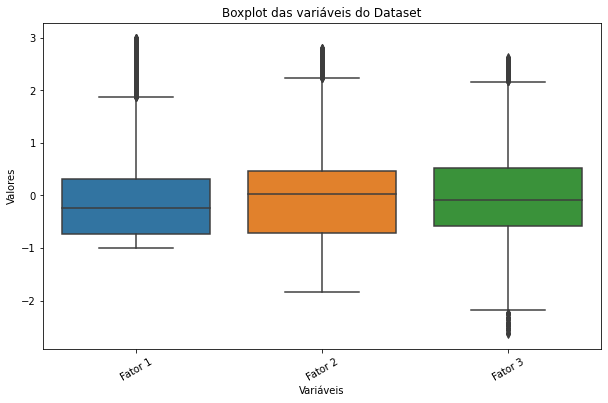

In [92]:
# Vamos fazer um boxplot das variaveis a serem agrupadas novamente para verificarmos os outliers
# Irei fazer um boxplot dos fatores criado para verificar presença de outliers
plt.figure(figsize=(10,6))

sns.boxplot(data = pd.melt(df4[['Fator 1', 'Fator 2', 'Fator 3']]), x = 'variable', y = 'value')
plt.title('Boxplot das variáveis do Dataset')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation = 30)
plt.show()

> Ja ouve uma diminuição no número de outliers removendo apenas algumas linhas

In [93]:
# Verificando se ainda está com media = 0 e std = 1
df4.describe()
# Não está exatamente padronizado, mas está bem balanceada. Continuaremos dessa maneira

,Fator 1,Fator 2,Fator 3
count,8365.000000,8365.000000,8365.000000
mean,-0.087720,-0.061450,-0.019429
std,0.773688,0.906812,0.813464
min,-0.995356,-1.830941,-2.635541
25%,-0.728140,-0.716396,-0.579578
50%,-0.244129,0.033896,-0.095968
75%,0.309635,0.461116,0.515333
max,2.999196,2.806650,2.627843


In [94]:
kmeans2 = KMeans(n_clusters=5, init = 'random').fit(df4)

In [95]:
kmeans_cluster2 = kmeans2.labels_
print(kmeans_cluster2)
df4['kmeans_cluster'] = kmeans_cluster2
df4.head()

[2 3 1 ... 0 2 1]


,Fator 1,Fator 2,Fator 3,kmeans_cluster
0,-0.823331,-0.226420,-0.683822,2
1,-0.715514,1.152101,0.526886,3
2,0.492384,0.603352,-0.593279,1
3,-0.854400,0.106164,-0.688510,2
4,0.053670,-0.709212,0.568313,0


In [96]:
# Se comparado com o cluster antes de tratar os outliers, podemos ver que os registros estão agora mais balanceados que o outro (linha abaixo)
# Isso se dá pois, como pode mos notar nos scatterplots criados para o outro modelo pre retirada de outliers, o cluster 2 continha valores muito distantes dos outros, que era os outliers, portanto seu centroide se distanciou
# muito dos outros registros. Agora com a retirada de alguns desses outliers, pudemos equilibrar mais os clusters.
df4.kmeans_cluster.value_counts()

2    3542
0    2165
1    1019
3     995
4     644
Name: kmeans_cluster, dtype: int64

In [97]:
df3_factor2.cluster_kmeans.value_counts()

4    4023
2    2521
3    1068
0     983
1      41
Name: cluster_kmeans, dtype: int64

Selecionamos a priori 5 cluster para serem formados. Porém nao utilizamos nenhum método para definir isso. Iremos aplicar agora o método de Elbow para tentar identificar um numero de cluster que seja mais adequado

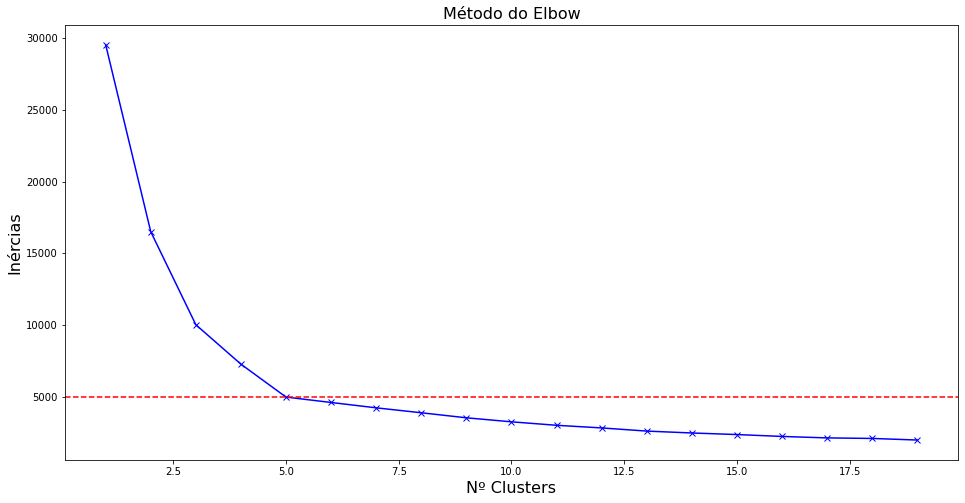

In [100]:
# Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "inércia": distância de cada obervação para o centróide de seu cluster
## Quanto mais próximos entre si e do centróide, menor a inércia
inercias = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df4)
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
plt.axhline(y = 5000, color = 'red', linestyle = '--')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Método do Elbow', fontsize=16)
plt.show()

> Pelo método elbow poderiamos escolher 4 clusters, ou até 5, como escolhemos anteriormente. Portanto não iremos alterar o que foi feito

In [99]:
# Visualização do cluster num plot3D
import plotly.express as px 
import plotly.io as pio

pio.renderers.default='browser'

fig = px.scatter_3d(df4, 
                    x='Fator 1', 
                    y='Fator 2', 
                    z='Fator 3',
                    color='kmeans_cluster')
fig.show()